# Question 4

In [26]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import random
from google.colab.patches import cv2_imshow
from scipy.signal import convolve2d

## part a

In [35]:
# Do not change this cell
image = cv2.imread('cat.png',cv2.IMREAD_GRAYSCALE)

In [36]:
def Add_Noise(img):
    """
    Add salt and pepper noise to the input image.
        Parameters:
          image: Input image (numpy array).
        Returns:
          Image with salt and pepper noise added.
    """
    noisy_image = np.copy(img)
    salt_vs_pepper = 0.2
    amount = 0.05

    num_salt = np.ceil(amount * img.size * salt_vs_pepper)
    num_pepper = np.ceil(amount * img.size * (1.0 - salt_vs_pepper))

    # Add Salt noise
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
    noisy_image[tuple(coords)] = 255

    # Add Pepper noise
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
    noisy_image[tuple(coords)] = 0

    return noisy_image

(-0.5, 374.5, 499.5, -0.5)

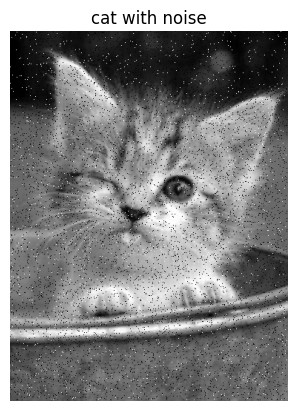

In [37]:
image = Add_Noise(image)
plt.imshow(image,cmap='gray')
plt.title("cat with noise")
plt.axis("off")

# part b

<h3> in this section we want to implement : </h3>

1.   Averaging Blurring
2.   Median Blurring
3.   Gaussian Blurring

<h3> you should define reflect101 padding function and use it befor blurring </h3>
<h3><b> note : you can't use libraries in this section </b></h3>
<h3><b> note : you can't use loop in Reflect101 function </b></h3>




In [38]:
def Reflect101(img,filter_size):
  '''
    Do not use loop (like while and for)
    Do not use libraries
    calculate averaging filter
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      image (ndarray): computed Reflect101
  '''

  #######################
  #    your code here   #
  image = np.pad(img, filter_size // 2, mode='reflect')
  #######################

  return image

In [67]:
def Averaging_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed averaging blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))

  #######################
  #    your code here   #
  result = np.zeros_like(img)
  for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          result[i][j] = np.mean(image[i:i+filter_size, j:j+filter_size])
  #######################

  return result

In [75]:
def Median_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed median blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))

  #######################
  #    your code here   #
  result = np.zeros_like(img)
  for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            result[i][j] = np.median(image[i:i+filter_size, j:j+filter_size])
  #######################

  return result

In [78]:
def Gaussian_Blurring(img, filter_size, std):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): std of gaussian kernel
    output(s):
      result (ndarray): computed gaussian blurring
    '''
    kernel = np.zeros((filter_size,filter_size))
    #######################
    #    your code here   #
    for i in range(filter_size):
        for j in range(filter_size):
            kernel[i,j] = (1/ (2 * np.pi * std ** 2)) * np.exp(- ((i - (filter_size - 1) / 2) ** 2 + (j - (filter_size - 1) / 2) ** 2) / (2 * std ** 2))
    kernel /= np.sum(kernel)

    #######################
    output = img.copy()
    result = cv2.filter2D(src = output, ddepth = -1, kernel = kernel)
    return result

(-0.5, 374.5, 499.5, -0.5)

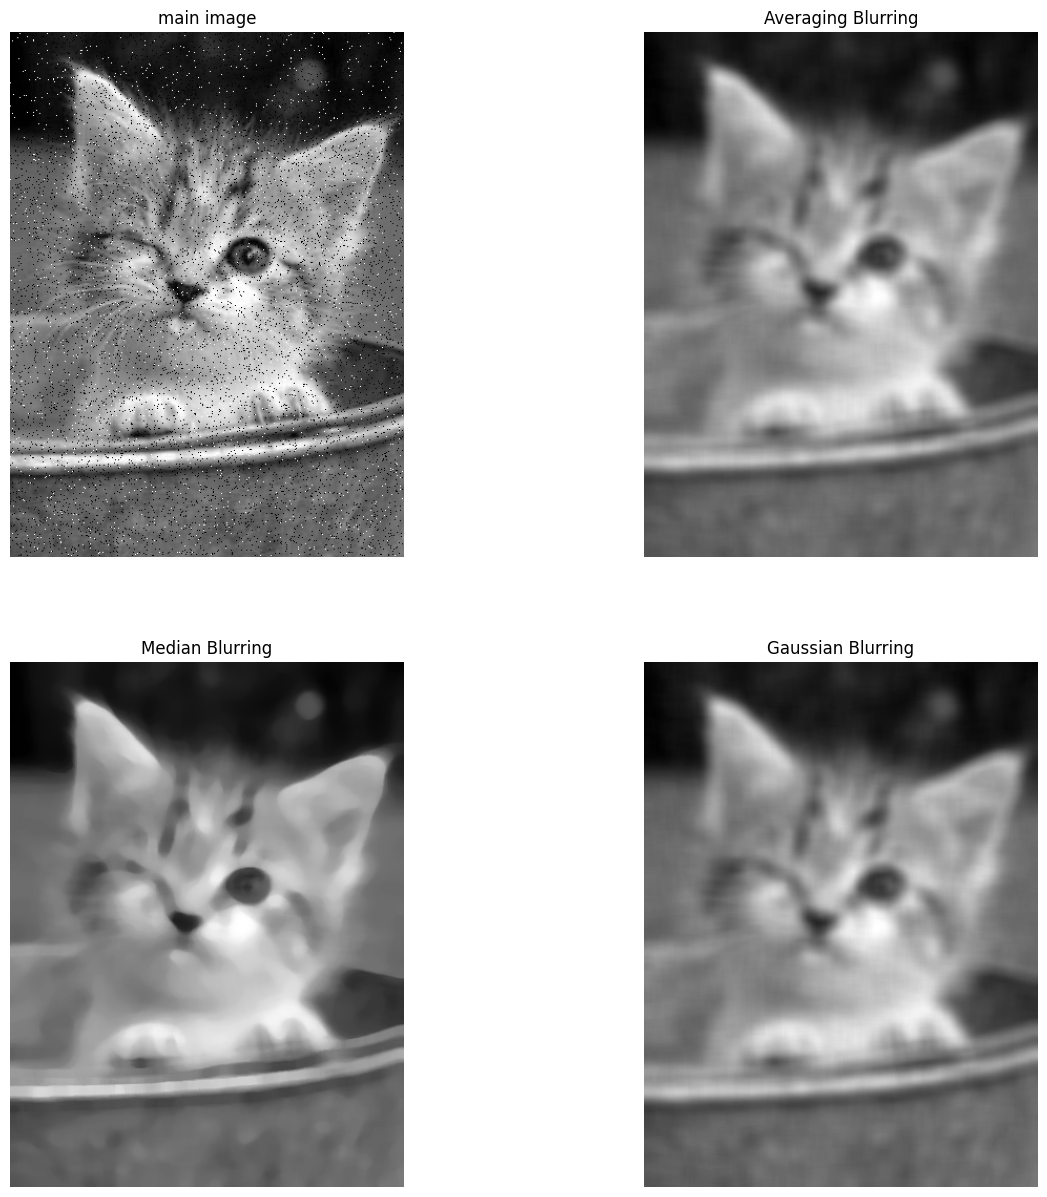

In [79]:
# Do not change this cell
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title("main image")
plt.axis("off")

AB = Averaging_Blurring(image,15)
plt.subplot(2,2,2)
plt.imshow(AB,cmap='gray')
plt.title("Averaging Blurring")
plt.axis("off")

MB = Median_Blurring(image,15)
plt.subplot(2,2,3)
plt.imshow(MB,cmap='gray')
plt.title("Median Blurring")
plt.axis("off")

GB = Gaussian_Blurring(image,15,40)
plt.subplot(2,2,4)
plt.imshow(GB,cmap='gray')
plt.title("Gaussian Blurring")
plt.axis("off")


## part c

<h3> in this section we want to implement all blurrings with opencv and compare their with part b </h3>
<h3><b> note : for comparison, the parameters should be the same as in part b </b></h3>

In [80]:
filter_size = 15
std = 40
AveragingBlurring = cv2.blur(image, (filter_size, filter_size))## your code here ##
MedianBlurring = cv2.medianBlur(image, filter_size)## your code here ##
GaussianBlurring = cv2.GaussianBlur(image, (filter_size, filter_size), std)## your code here ##

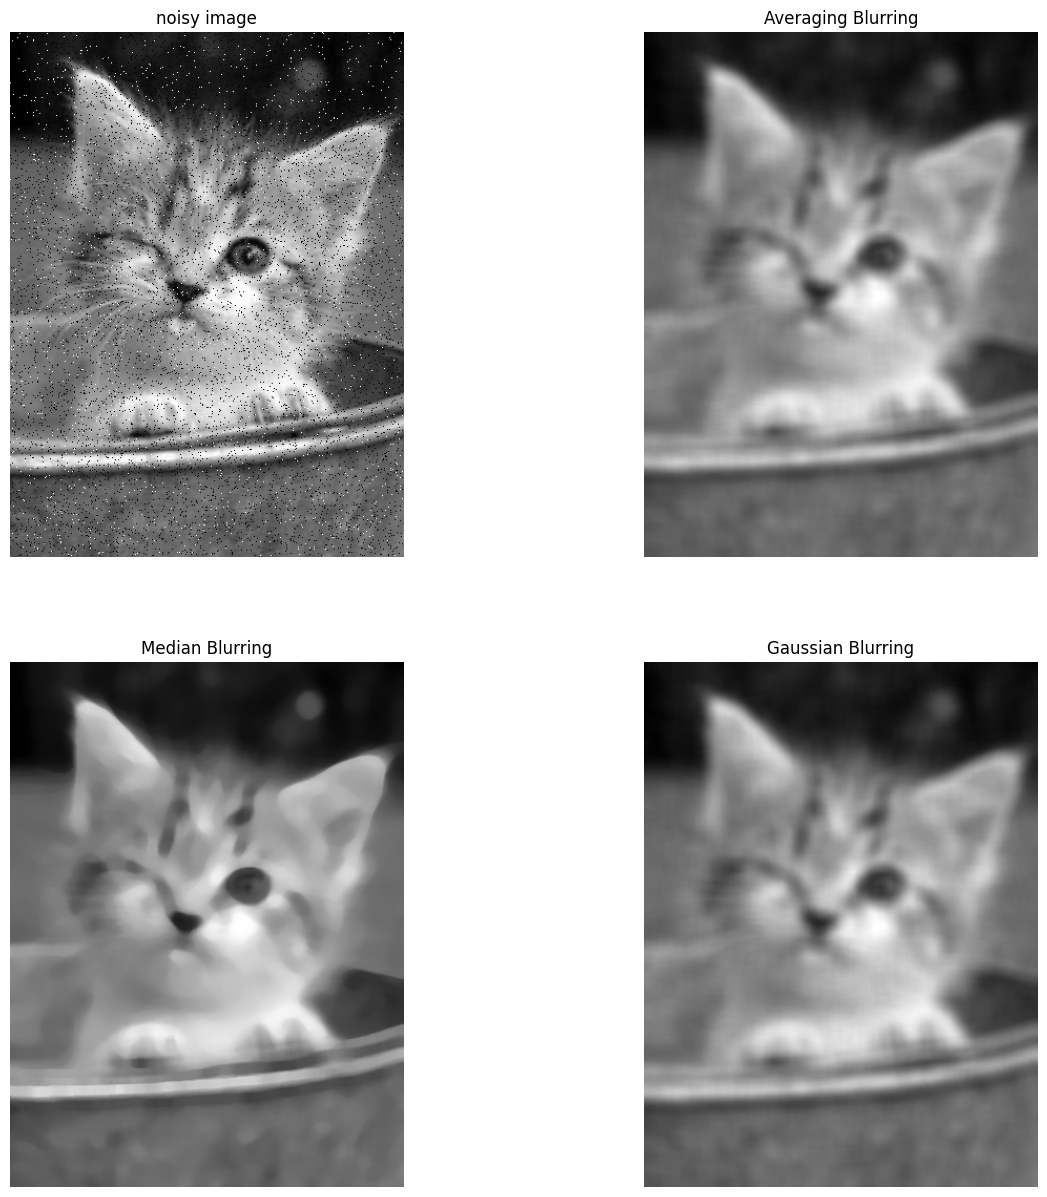

In [81]:
# Do not change this cell
Array = [image, AveragingBlurring, MedianBlurring, GaussianBlurring]
titles = ['noisy image', 'Averaging Blurring', 'Median Blurring', 'Gaussian Blurring']
plt.figure(figsize=(15,15))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(Array[i],cmap='gray')
  plt.title(titles[i])
  plt.axis("off")